In [1]:
# Import libraries to be used

# Warning messages display
## import warnings
## warnings.filterwarnings(action='ignore') # https://docs.python.org/3/library/warnings.html#the-warnings-filter

# Directories/Files management
import os.path
## from zipfile import ZipFile # De momento no ha hecho falta 

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
## pd.set_option('display.max_rows', None) # It greatly slows down the output display and freezes the kernel

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
## import altair as alt

# Machine Learning
## from sklearn.[...] import ...

In [2]:
# Detect Operating System running and manage paths accordingly

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


Additional information on each column meaning can be found [here](https://www.transtats.bts.gov/Fields.asp?Table_ID=236&SYS_Table_Name=T_ONTIME_REPORTING&User_Table_Name=Reporting%20Carrier%20On-Time%20Performance%20(1987-present)&Year_Info=1&First_Year=1987&Last_Year=2020&Rate_Info=0&Frequency=Monthly&Data_Frequency=Annual,Quarterly,Monthly).

In [3]:
csv_path = os.path.join(root,
                        "Output_Data",
                        "US_DoT",
                        "OTP_Fuel_output_2019.csv")
csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\US_DoT\\OTP_Fuel_output_2019.csv'

In [4]:
%%time

df_OTPF = pd.read_csv(csv_path,
                      encoding='latin1',
                      nrows=1e6, # Fail-safe: in case the file is inadvertently too big
                      low_memory = True) # This will attempt auto-dtypes

df_OTPF

Wall time: 15 ms


,OP_CARRIER_AIRLINE_ID,OP_UNIQUE_CARRIER,OP_CARRIER,ORIGIN_CITY_MARKET_ID_count,ORIGIN_count,DEST_CITY_MARKET_ID_count,DEST_count,DEP_DELAY_sum,DEP_DELAY_mean,DEP_DELAY_min,DEP_DELAY_max,DEP_DELAY_median,TAXI_OUT_sum,TAXI_OUT_mean,TAXI_OUT_median,TAXI_IN_sum,TAXI_IN_mean,TAXI_IN_median,ARR_DELAY_sum,ARR_DELAY_mean,ARR_DELAY_min,ARR_DELAY_max,ARR_DELAY_median,CANCELLED_sum,CANCELLED_mode,DIVERTED_sum,DIVERTED_mode,ACTUAL-CRS_ELAPSED_TIME_sum,ACTUAL-CRS_ELAPSED_TIME_mean,ACTUAL-CRS_ELAPSED_TIME_min,ACTUAL-CRS_ELAPSED_TIME_max,ACTUAL-CRS_ELAPSED_TIME_median,AIR_TIME_sum,AIR_TIME_mean,AIR_TIME_median,FLIGHTS_mode,DISTANCE_sum,DISTANCE_mean,DISTANCE_median,AIRLINE_ID,UNIQUE_CARRIER,CARRIER,CARRIER_NAME,TS_GALLONS (millions),TN_GALLONS (millions),TDOMT_GALLONS (millions),TINT_GALLONS (millions),TOTAL_GALLONS (millions),TS_COST (millions),TN_COST (millions),TDOMT_COST (millions),TINT_COST (millions),TOTAL_COST (millions)
0,19393,WN,WN,1363946,1363946,1363946,1363946,13543841.0,10.178762,-42.0,804.0,0.0,16365531.0,12.301396,11.0,7108032.0,5.344940,4.0,3421593.0,2.577351,-94.0,809.0,-6.0,33622.0,0.0,2762.0,0.0,-10054473.0,-7.573637,-91.0,194.0,-8.0,137045127.0,103.230679,90.0,1.0,1.011585e+09,741.660315,628.0,19393.0,WN,WN,Southwest Airlines Co.,2076.519421,1.286294,2053.144414,24.661301,2077.805715,4140.647257,2.589907,4084.883904,58.353260,4143.237164
1,19690,HA,HA,83891,83891,83891,83891,108602.0,1.296400,-29.0,1536.0,-3.0,1003874.0,11.984838,11.0,615110.0,7.344948,6.0,53979.0,0.644995,-93.0,1507.0,-4.0,137.0,0.0,65.0,0.0,-52350.0,-0.625530,-89.0,105.0,-1.0,8289439.0,99.050520,28.0,1.0,6.297441e+07,750.669404,163.0,19690.0,HA,HA,Hawaiian Airlines Inc.,269.521723,0.479823,186.097777,83.903769,270.001546,520.473090,0.941322,361.494495,159.919917,521.414412
2,19790,DL,DL,991986,991986,991986,991986,8075787.0,8.155754,-43.0,1266.0,-2.0,17062535.0,17.232186,15.0,7600296.0,7.676508,6.0,1171704.0,1.185905,-88.0,1304.0,-8.0,1842.0,0.0,2119.0,0.0,-6823468.0,-6.906169,-96.0,227.0,-8.0,119925386.0,121.378898,99.0,1.0,8.892775e+08,896.461779,696.0,19790.0,DL,DL,Delta Air Lines Inc.,3614.857331,24.380119,2212.107995,1427.129455,3639.237450,7252.167882,62.563701,4452.270621,2862.460962,7314.731583
3,19805,AA,AA,946776,946776,946776,946776,11235954.0,12.114915,-44.0,2315.0,-2.0,17211983.0,18.573274,16.0,8702242.0,9.392791,8.0,6437726.0,6.965412,-87.0,2350.0,-5.0,20151.0,0.0,2383.0,0.0,-4675333.0,-5.058559,-81.0,279.0,-7.0,124008417.0,134.173103,121.0,1.0,9.383259e+08,991.074843,868.0,19805.0,AA,AA,American Airlines Inc.,3659.887150,6.669460,2277.466904,1389.089706,3666.556610,7119.982564,13.080464,4380.597578,2752.465450,7133.063028
4,19930,AS,AS,264816,264816,264816,264816,1318662.0,5.034637,-56.0,1117.0,-4.0,5068625.0,19.361638,17.0,2177245.0,8.326462,6.0,352734.0,1.351394,-85.0,1087.0,-6.0,3077.0,0.0,724.0,0.0,-941620.0,-3.607532,-81.0,240.0,-4.0,45135699.0,172.923774,142.0,1.0,3.484294e+08,1315.741488,1009.0,19930.0,AS,AS,Alaska Airlines Inc.,729.968382,0.449692,719.998939,11.186797,731.185736,1604.012231,2.368290,1578.035484,28.345037,1606.380521
5,19977,UA,UA,625910,625910,625910,625910,8072804.0,13.004564,-48.0,1525.0,-3.0,12404222.0,19.988820,17.0,4971548.0,8.014283,6.0,5128737.0,8.289444,-91.0,1523.0,-6.0,5384.0,0.0,1819.0,0.0,-2859008.0,-4.620940,-87.0,298.0,-7.0,96661244.0,156.231050,135.0,1.0,7.484520e+08,1195.782122,997.0,19977.0,UA,UA,United Air Lines Inc.,3548.478825,14.747072,1767.221317,1796.004580,3563.225897,6995.166149,28.799775,3457.587592,3566.378332,7023.965924
6,20304,OO,OO,836445,836445,836445,836445,10299232.0,12.564053,-82.0,2710.0,-3.0,15758182.0,19.233785,17.0,6288526.0,7.687628,6.0,5861765.0,7.184953,-84.0,2695.0,-8.0,17453.0,0.0,3153.0,0.0,-4317419.0,-5.291999,-221.0,203.0,-7.0,62133877.0,76.159484,68.0,1.0,4.106058e+08,490.893988,421.0,20304.0,OO,OO,SkyWest Airlines Inc.,104.186650,0.000000,104.186650,0.000000,104.186650,245.452427,0.000000,245.452427,0.000000,245.452427
7,20363,9E,9E,257132,257132,257132,257132,259

### Potentially relevant vizualizations VS A/L:

- Preferred city markets by A/L (Takeoff): ```'ORIGIN_CITY_MARKET_ID' : ['count']```
- Most used airports by A/L (Takeoff): ```'ORIGIN' : ['count']```
- Preferred city markets by A/L (Landing): ```'DEST_CITY_MARKET_ID' : ['count']```
- Most used airports by A/L (Landing): ```'DEST' : ['count']```
- Departure delay: ```'DEP_DELAY' : ['sum', 'mean', 'min', 'max', 'median']```
    - Sum: assess absolute operating cost increments due to departure delays
    - Mean: compare different average delays between A/Ls
    - Min: check how much in advance the A/Ls are able to prepare for a flight
    - Max: evaluate if extreme values of delays are moving excessively the mean value
    - Median: double-check if extreme values separate mean and median values too much
- Taxi-out operations: ```'TAXI_OUT' : ['sum', 'mean', 'median']```
    - Sum: assess absolute operating cost contribution of taxi-out operations
    - Mean: compare different average taxi-out times between A/Ls
    - Median: double-check if extreme values separate mean and median values too much
- Taxi-in operations: ```'TAXI_IN' : ['sum', 'mean', 'median']```
    - Sum: assess absolute operating cost contribution of taxi-in operations
    - Mean: compare different average taxi-in times between A/Ls
    - Median: double-check if extreme values separate mean and median values too much
- Arrival delay: ```'ARR_DELAY' : ['sum', 'mean', 'min', 'max', 'median']```
    - Sum: assess absolute operating cost increments due to arrival delays
    - Mean: compare different average delays between A/Ls
    - Min: check how much in advance the A/Ls are able to arrive at the destination airport
    - Max: evaluate if extreme values of delays are moving excessively the mean values
    - Median: double-check if extreme values separate mean and median values too much
- Cancelled flights: ```'CANCELLED' : ['sum', mode]```
    - Sum: assess absolute operating cost increments due to cancellations
    - Mode: ensure that '0' (i.e. not cancelled) is the most frequent value and investigate otherwise
- Diverted flights: ```'DIVERTED' : ['sum', mode]```
    - Sum: assess absolute operating cost increments due to diversions
    - Mode: ensure that '0' (i.e. not diverted) is the most frequent value and investigate otherwise
- Elapsed time difference (Actual - CRS): ```'ACTUAL-CRS_ELAPSED_TIME' : ['sum', 'mean', 'min', 'max', 'median']```
    - Sum: assess absolute operating cost increments due to overall delays
    - Mean: compare different average overall delays between A/Ls
    - Min: check how much in advance the A/Ls are able to arrive at the destination airport, considering also potentially advances at departure
    - Max: evaluate if extreme values of overall delays are moving excessively the mean values
    - Median: double-check if extreme values separate mean and median values too much
- Air time: ```'AIR_TIME' : ['sum', 'mean', 'median']```
    - Sum: assess absolute operating cost contribution of air time
    - Mean: compare different average air times between A/Ls
    - Median: double-check if extreme values separate mean and median values too much
- Number of flights *(legs)*: ```'FLIGHTS' : [mode]```
    - Mode: check how frequent is that flights consist of more than one leg
- Distance: ```'DISTANCE' : ['sum', 'mean', 'median']```
    - Sum: assess absolute operating cost contribution of distance
    - Mean: compare different average distances between A/Ls
    - Median: double-check if extreme values separate mean and median values too much

In [5]:
df_OTPF

,OP_CARRIER_AIRLINE_ID,OP_UNIQUE_CARRIER,OP_CARRIER,ORIGIN_CITY_MARKET_ID_count,ORIGIN_count,DEST_CITY_MARKET_ID_count,DEST_count,DEP_DELAY_sum,DEP_DELAY_mean,DEP_DELAY_min,DEP_DELAY_max,DEP_DELAY_median,TAXI_OUT_sum,TAXI_OUT_mean,TAXI_OUT_median,TAXI_IN_sum,TAXI_IN_mean,TAXI_IN_median,ARR_DELAY_sum,ARR_DELAY_mean,ARR_DELAY_min,ARR_DELAY_max,ARR_DELAY_median,CANCELLED_sum,CANCELLED_mode,DIVERTED_sum,DIVERTED_mode,ACTUAL-CRS_ELAPSED_TIME_sum,ACTUAL-CRS_ELAPSED_TIME_mean,ACTUAL-CRS_ELAPSED_TIME_min,ACTUAL-CRS_ELAPSED_TIME_max,ACTUAL-CRS_ELAPSED_TIME_median,AIR_TIME_sum,AIR_TIME_mean,AIR_TIME_median,FLIGHTS_mode,DISTANCE_sum,DISTANCE_mean,DISTANCE_median,AIRLINE_ID,UNIQUE_CARRIER,CARRIER,CARRIER_NAME,TS_GALLONS (millions),TN_GALLONS (millions),TDOMT_GALLONS (millions),TINT_GALLONS (millions),TOTAL_GALLONS (millions),TS_COST (millions),TN_COST (millions),TDOMT_COST (millions),TINT_COST (millions),TOTAL_COST (millions)
0,19393,WN,WN,1363946,1363946,1363946,1363946,13543841.0,10.178762,-42.0,804.0,0.0,16365531.0,12.301396,11.0,7108032.0,5.344940,4.0,3421593.0,2.577351,-94.0,809.0,-6.0,33622.0,0.0,2762.0,0.0,-10054473.0,-7.573637,-91.0,194.0,-8.0,137045127.0,103.230679,90.0,1.0,1.011585e+09,741.660315,628.0,19393.0,WN,WN,Southwest Airlines Co.,2076.519421,1.286294,2053.144414,24.661301,2077.805715,4140.647257,2.589907,4084.883904,58.353260,4143.237164
1,19690,HA,HA,83891,83891,83891,83891,108602.0,1.296400,-29.0,1536.0,-3.0,1003874.0,11.984838,11.0,615110.0,7.344948,6.0,53979.0,0.644995,-93.0,1507.0,-4.0,137.0,0.0,65.0,0.0,-52350.0,-0.625530,-89.0,105.0,-1.0,8289439.0,99.050520,28.0,1.0,6.297441e+07,750.669404,163.0,19690.0,HA,HA,Hawaiian Airlines Inc.,269.521723,0.479823,186.097777,83.903769,270.001546,520.473090,0.941322,361.494495,159.919917,521.414412
2,19790,DL,DL,991986,991986,991986,991986,8075787.0,8.155754,-43.0,1266.0,-2.0,17062535.0,17.232186,15.0,7600296.0,7.676508,6.0,1171704.0,1.185905,-88.0,1304.0,-8.0,1842.0,0.0,2119.0,0.0,-6823468.0,-6.906169,-96.0,227.0,-8.0,119925386.0,121.378898,99.0,1.0,8.892775e+08,896.461779,696.0,19790.0,DL,DL,Delta Air Lines Inc.,3614.857331,24.380119,2212.107995,1427.129455,3639.237450,7252.167882,62.563701,4452.270621,2862.460962,7314.731583
3,19805,AA,AA,946776,946776,946776,946776,11235954.0,12.114915,-44.0,2315.0,-2.0,17211983.0,18.573274,16.0,8702242.0,9.392791,8.0,6437726.0,6.965412,-87.0,2350.0,-5.0,20151.0,0.0,2383.0,0.0,-4675333.0,-5.058559,-81.0,279.0,-7.0,124008417.0,134.173103,121.0,1.0,9.383259e+08,991.074843,868.0,19805.0,AA,AA,American Airlines Inc.,3659.887150,6.669460,2277.466904,1389.089706,3666.556610,7119.982564,13.080464,4380.597578,2752.465450,7133.063028
4,19930,AS,AS,264816,264816,264816,264816,1318662.0,5.034637,-56.0,1117.0,-4.0,5068625.0,19.361638,17.0,2177245.0,8.326462,6.0,352734.0,1.351394,-85.0,1087.0,-6.0,3077.0,0.0,724.0,0.0,-941620.0,-3.607532,-81.0,240.0,-4.0,45135699.0,172.923774,142.0,1.0,3.484294e+08,1315.741488,1009.0,19930.0,AS,AS,Alaska Airlines Inc.,729.968382,0.449692,719.998939,11.186797,731.185736,1604.012231,2.368290,1578.035484,28.345037,1606.380521
5,19977,UA,UA,625910,625910,625910,625910,8072804.0,13.004564,-48.0,1525.0,-3.0,12404222.0,19.988820,17.0,4971548.0,8.014283,6.0,5128737.0,8.289444,-91.0,1523.0,-6.0,5384.0,0.0,1819.0,0.0,-2859008.0,-4.620940,-87.0,298.0,-7.0,96661244.0,156.231050,135.0,1.0,7.484520e+08,1195.782122,997.0,19977.0,UA,UA,United Air Lines Inc.,3548.478825,14.747072,1767.221317,1796.004580,3563.225897,6995.166149,28.799775,3457.587592,3566.378332,7023.965924
6,20304,OO,OO,836445,836445,836445,836445,10299232.0,12.564053,-82.0,2710.0,-3.0,15758182.0,19.233785,17.0,6288526.0,7.687628,6.0,5861765.0,7.184953,-84.0,2695.0,-8.0,17453.0,0.0,3153.0,0.0,-4317419.0,-5.291999,-221.0,203.0,-7.0,62133877.0,76.159484,68.0,1.0,4.106058e+08,490.893988,421.0,20304.0,OO,OO,SkyWest Airlines Inc.,104.186650,0.000000,104.186650,0.000000,104.186650,245.452427,0.000000,245.452427,0.000000,245.452427
7,20363,9E,9E,257132,257132,257132,257132,259

In [9]:
df_OTPF.shape

(17, 53)

In [10]:
# %%time

# # Heatmap showing global correlations
# fig, ax = plt.subplots(figsize=(10, 7))
# ax = sns.heatmap(df_OTPF.corr(), vmin=-1, vmax=1, annot=False, cbar=True, cmap=sns.cm.rocket);

In [11]:
df_OTPF.shape[1]

53

In [16]:
cols = df_OTPF.select_dtypes('number').drop(['OP_CARRIER_AIRLINE_ID', 'AIRLINE_ID'], axis=1).columns.tolist()
print(len(cols))
cols

46


['ORIGIN_CITY_MARKET_ID_count',
 'ORIGIN_count',
 'DEST_CITY_MARKET_ID_count',
 'DEST_count',
 'DEP_DELAY_sum',
 'DEP_DELAY_mean',
 'DEP_DELAY_min',
 'DEP_DELAY_max',
 'DEP_DELAY_median',
 'TAXI_OUT_sum',
 'TAXI_OUT_mean',
 'TAXI_OUT_median',
 'TAXI_IN_sum',
 'TAXI_IN_mean',
 'TAXI_IN_median',
 'ARR_DELAY_sum',
 'ARR_DELAY_mean',
 'ARR_DELAY_min',
 'ARR_DELAY_max',
 'ARR_DELAY_median',
 'CANCELLED_sum',
 'CANCELLED_mode',
 'DIVERTED_sum',
 'DIVERTED_mode',
 'ACTUAL-CRS_ELAPSED_TIME_sum',
 'ACTUAL-CRS_ELAPSED_TIME_mean',
 'ACTUAL-CRS_ELAPSED_TIME_min',
 'ACTUAL-CRS_ELAPSED_TIME_max',
 'ACTUAL-CRS_ELAPSED_TIME_median',
 'AIR_TIME_sum',
 'AIR_TIME_mean',
 'AIR_TIME_median',
 'FLIGHTS_mode',
 'DISTANCE_sum',
 'DISTANCE_mean',
 'DISTANCE_median',
 'TS_GALLONS (millions)',
 'TN_GALLONS (millions)',
 'TDOMT_GALLONS (millions)',
 'TINT_GALLONS (millions)',
 'TOTAL_GALLONS (millions)',
 'TS_COST (millions)',
 'TN_COST (millions)',
 'TDOMT_COST (millions)',
 'TINT_COST (millions)',
 'TOTAL_COST 

Wall time: 9.4 s


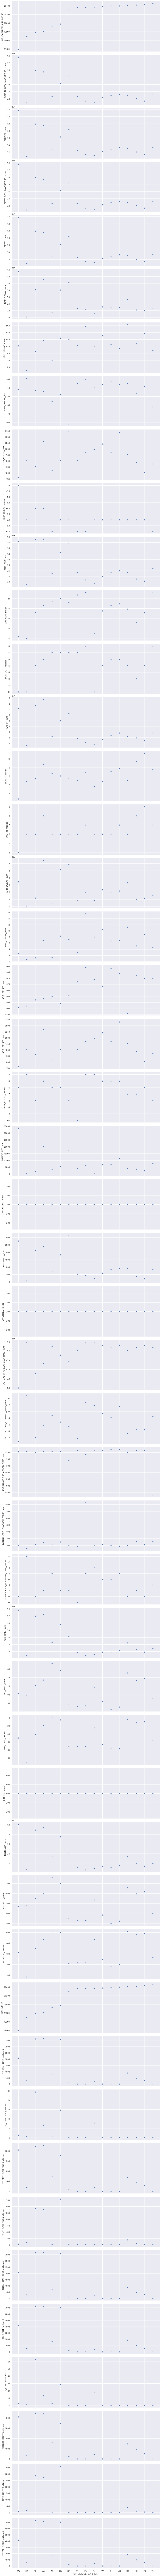

In [14]:
%%time

sns.pairplot(data=df_OTPF,
             x_vars=['OP_UNIQUE_CARRIER'],
             y_vars=df_OTPF.select_dtypes('number').columns,
             diag_kind=None, # This is added to work around the "pairplot y_vars bug #2260"
             aspect=3,
             height=4).set(xticks=df_OTPF['OP_UNIQUE_CARRIER'].unique(),
                           xticklabels=df_OTPF['OP_UNIQUE_CARRIER'].unique());

In [30]:
len(df_OTPF[cols].columns)

46

Wall time: 17.9 s


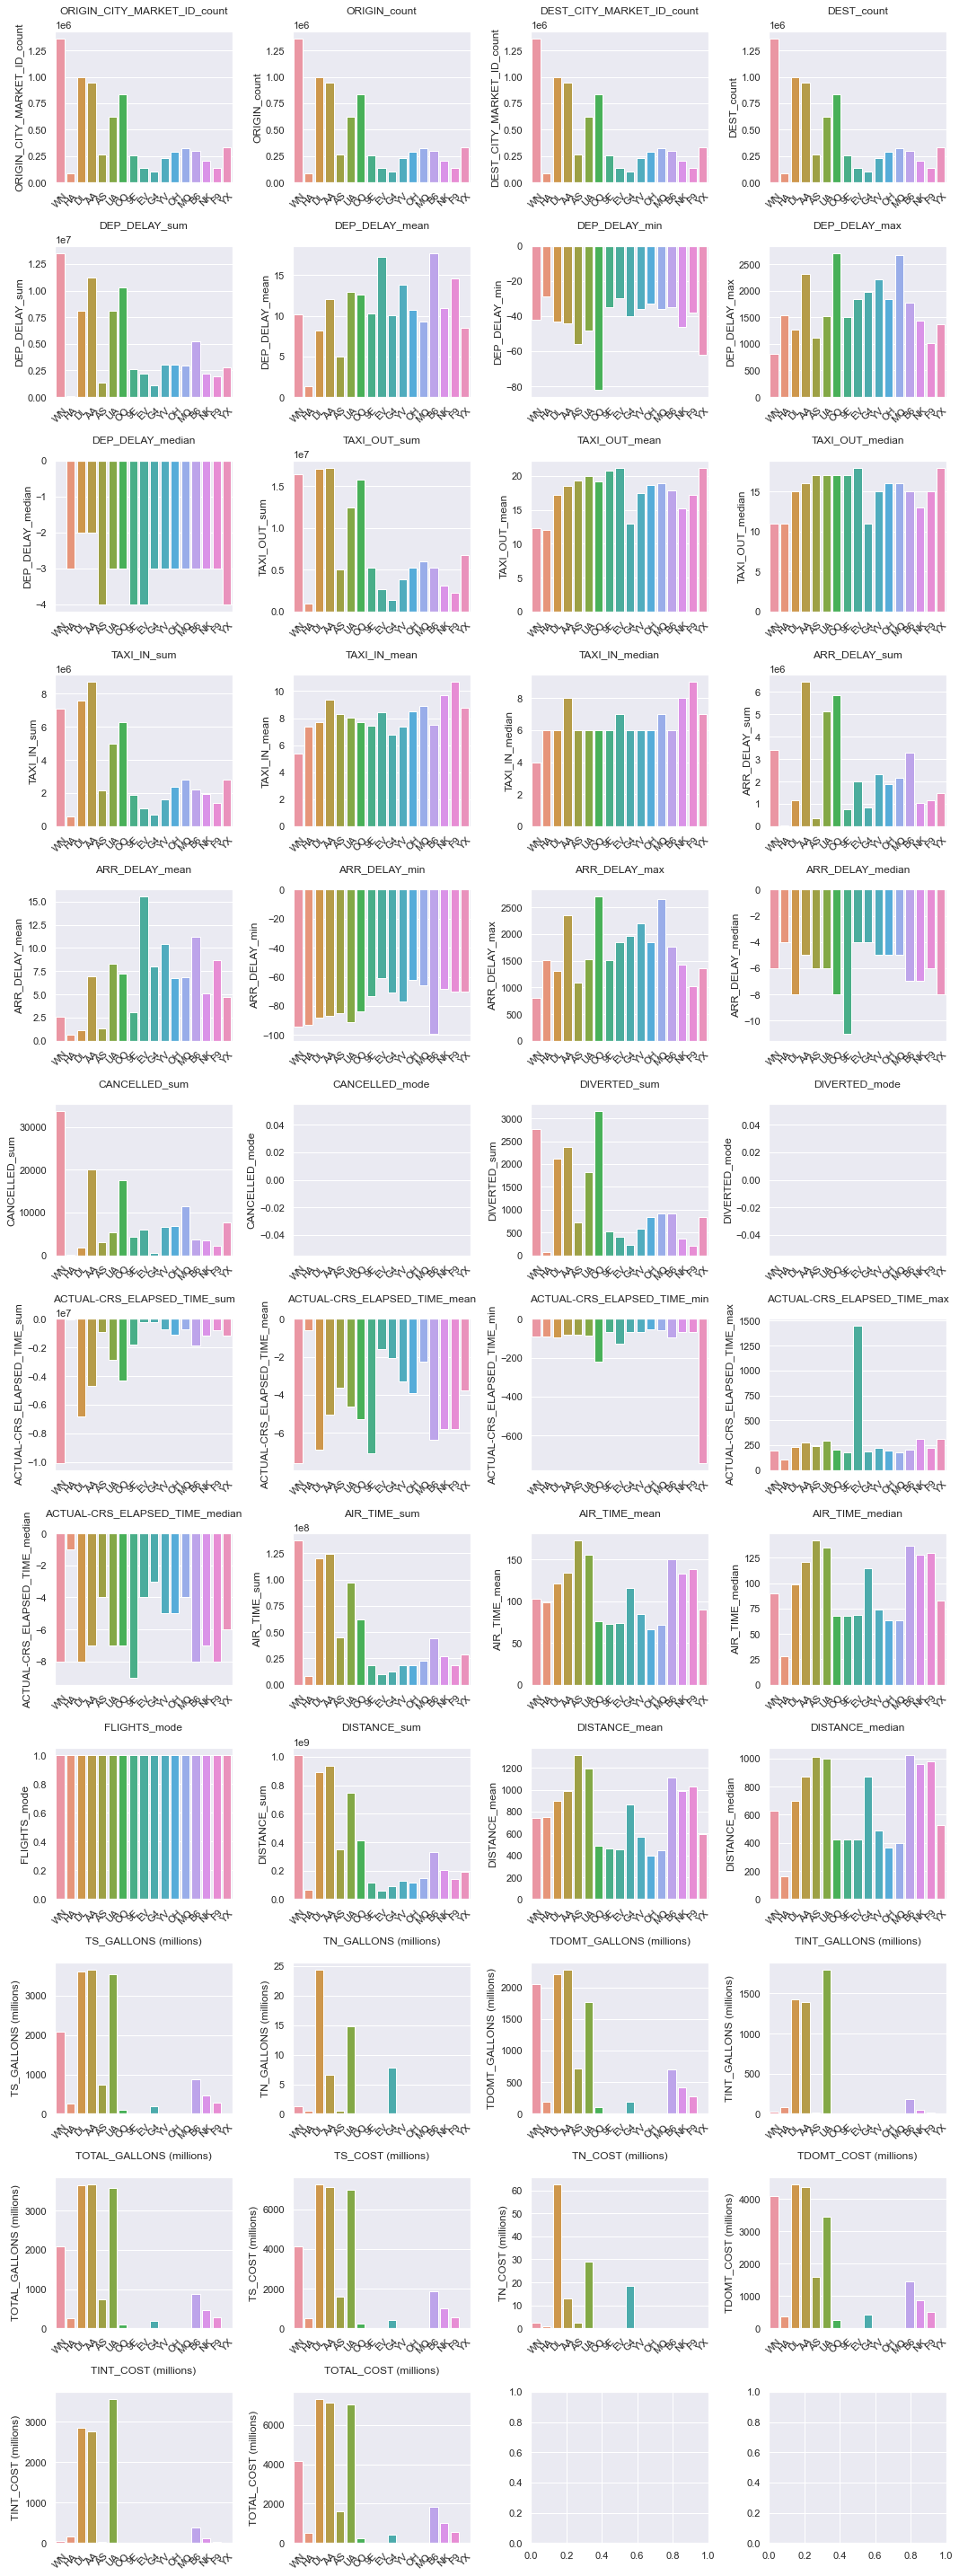

In [36]:
%%time

x_labels = list(df_OTPF['OP_UNIQUE_CARRIER'].unique())
x_labels

fig, ax = plt.subplots(12, 4, figsize=(15,40))

k = 0
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        if i == 11 and j == 2:
            break
        ax[i,j].set_title(label=df_OTPF[cols].columns[k],
                          fontdict={'fontsize' : 12},
                          loc='center',
                          pad=20)
        # The next line prevents the "UserWarning: FixedFormatter should only be used together with FixedLocator" message
        ax[i,j].set_xticks(np.arange(len(x_labels)))
        ax[i,j].set_xticklabels(labels=x_labels, rotation=45)
#         if i == 0:
#             ax[i,j].set_ylim(0, 4e3)
#         elif i == 1:
#             ax[i,j].set_ylim(0, 8e3)            
        # ax[i,j].tick_params(labelrotation=45)
            
        sns.barplot(x=x_labels, y=df_OTPF[cols].columns[k],
                    data=df_OTPF[cols], ax=ax[i,j])
        
        k += 1

fig.tight_layout()

fig_path = os.path.join(root,
                        "Output_Data",
                        "US_DoT",
                        "OTP_Fuel_analysis_output_2019.png")

plt.savefig(fname = fig_path, dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', format="png", transparent=False,
            bbox_inches=None, pad_inches=0.1, metadata=None)

*'ORIGIN_CITY_MARKET_ID_count', 'ORIGIN_count', 'DEST_CITY_MARKET_ID_count', 'DEST_count'*:
- US top5 flying A/L in 2019:
    - **WN (Southwest Airlines) : 1363946 flights**
    - DL (Delta Air Lines) : 991986	flights
    - AA (American Airlines) : 946776	flights
    - OO (SkyWest Airlines) : 836445	flights
    - UA (United Airlines) : 625910	flights

**Since the difference between those airlines and the remaining ones in terms of number of flights is so big, the rest of the analysis will focus in these five carriers.**

In [43]:
df_OTPF_top5 = df_OTPF[df_OTPF['OP_UNIQUE_CARRIER'].isin(['WN', 'DL', 'AA', 'UA', 'OO'])].copy()
df_OTPF_top5

,OP_CARRIER_AIRLINE_ID,OP_UNIQUE_CARRIER,OP_CARRIER,ORIGIN_CITY_MARKET_ID_count,ORIGIN_count,DEST_CITY_MARKET_ID_count,DEST_count,DEP_DELAY_sum,DEP_DELAY_mean,DEP_DELAY_min,DEP_DELAY_max,DEP_DELAY_median,TAXI_OUT_sum,TAXI_OUT_mean,TAXI_OUT_median,TAXI_IN_sum,TAXI_IN_mean,TAXI_IN_median,ARR_DELAY_sum,ARR_DELAY_mean,ARR_DELAY_min,ARR_DELAY_max,ARR_DELAY_median,CANCELLED_sum,CANCELLED_mode,DIVERTED_sum,DIVERTED_mode,ACTUAL-CRS_ELAPSED_TIME_sum,ACTUAL-CRS_ELAPSED_TIME_mean,ACTUAL-CRS_ELAPSED_TIME_min,ACTUAL-CRS_ELAPSED_TIME_max,ACTUAL-CRS_ELAPSED_TIME_median,AIR_TIME_sum,AIR_TIME_mean,AIR_TIME_median,FLIGHTS_mode,DISTANCE_sum,DISTANCE_mean,DISTANCE_median,AIRLINE_ID,UNIQUE_CARRIER,CARRIER,CARRIER_NAME,TS_GALLONS (millions),TN_GALLONS (millions),TDOMT_GALLONS (millions),TINT_GALLONS (millions),TOTAL_GALLONS (millions),TS_COST (millions),TN_COST (millions),TDOMT_COST (millions),TINT_COST (millions),TOTAL_COST (millions)
0,19393,WN,WN,1363946,1363946,1363946,1363946,13543841.0,10.178762,-42.0,804.0,0.0,16365531.0,12.301396,11.0,7108032.0,5.344940,4.0,3421593.0,2.577351,-94.0,809.0,-6.0,33622.0,0.0,2762.0,0.0,-10054473.0,-7.573637,-91.0,194.0,-8.0,137045127.0,103.230679,90.0,1.0,1.011585e+09,741.660315,628.0,19393.0,WN,WN,Southwest Airlines Co.,2076.519421,1.286294,2053.144414,24.661301,2077.805715,4140.647257,2.589907,4084.883904,58.353260,4143.237164
2,19790,DL,DL,991986,991986,991986,991986,8075787.0,8.155754,-43.0,1266.0,-2.0,17062535.0,17.232186,15.0,7600296.0,7.676508,6.0,1171704.0,1.185905,-88.0,1304.0,-8.0,1842.0,0.0,2119.0,0.0,-6823468.0,-6.906169,-96.0,227.0,-8.0,119925386.0,121.378898,99.0,1.0,8.892775e+08,896.461779,696.0,19790.0,DL,DL,Delta Air Lines Inc.,3614.857331,24.380119,2212.107995,1427.129455,3639.237450,7252.167882,62.563701,4452.270621,2862.460962,7314.731583
3,19805,AA,AA,946776,946776,946776,946776,11235954.0,12.114915,-44.0,2315.0,-2.0,17211983.0,18.573274,16.0,8702242.0,9.392791,8.0,6437726.0,6.965412,-87.0,2350.0,-5.0,20151.0,0.0,2383.0,0.0,-4675333.0,-5.058559,-81.0,279.0,-7.0,124008417.0,134.173103,121.0,1.0,9.383259e+08,991.074843,868.0,19805.0,AA,AA,American Airlines Inc.,3659.887150,6.669460,2277.466904,1389.089706,3666.556610,7119.982564,13.080464,4380.597578,2752.465450,7133.063028
5,19977,UA,UA,625910,625910,625910,625910,8072804.0,13.004564,-48.0,1525.0,-3.0,12404222.0,19.988820,17.0,4971548.0,8.014283,6.0,5128737.0,8.289444,-91.0,1523.0,-6.0,5384.0,0.0,1819.0,0.0,-2859008.0,-4.620940,-87.0,298.0,-7.0,96661244.0,156.231050,135.0,1.0,7.484520e+08,1195.782122,997.0,19977.0,UA,UA,United Air Lines Inc.,3548.478825,14.747072,1767.221317,1796.004580,3563.225897,6995.166149,28.799775,3457.587592,3566.378332,7023.965924
6,20304,OO,OO,836445,836445,836445,836445,10299232.0,12.564053,-82.0,2710.0,-3.0,15758182.0,19.233785,17.0,6288526.0,7.687628,6.0,5861765.0,7.184953,-84.0,2695.0,-8.0,17453.0,0.0,3153.0,0.0,-4317419.0,-5.291999,-221.0,203.0,-7.0,62133877.0,76.159484,68.0,1.0,4.106058e+08,490.893988,421.0,20304.0,OO,OO,SkyWest Airlines Inc.,104.186650,0.000000,104.186650,0.000000,104.186650,245.452427,0.000000,245.452427,0.000000,245.452427


Wall time: 10.9 s


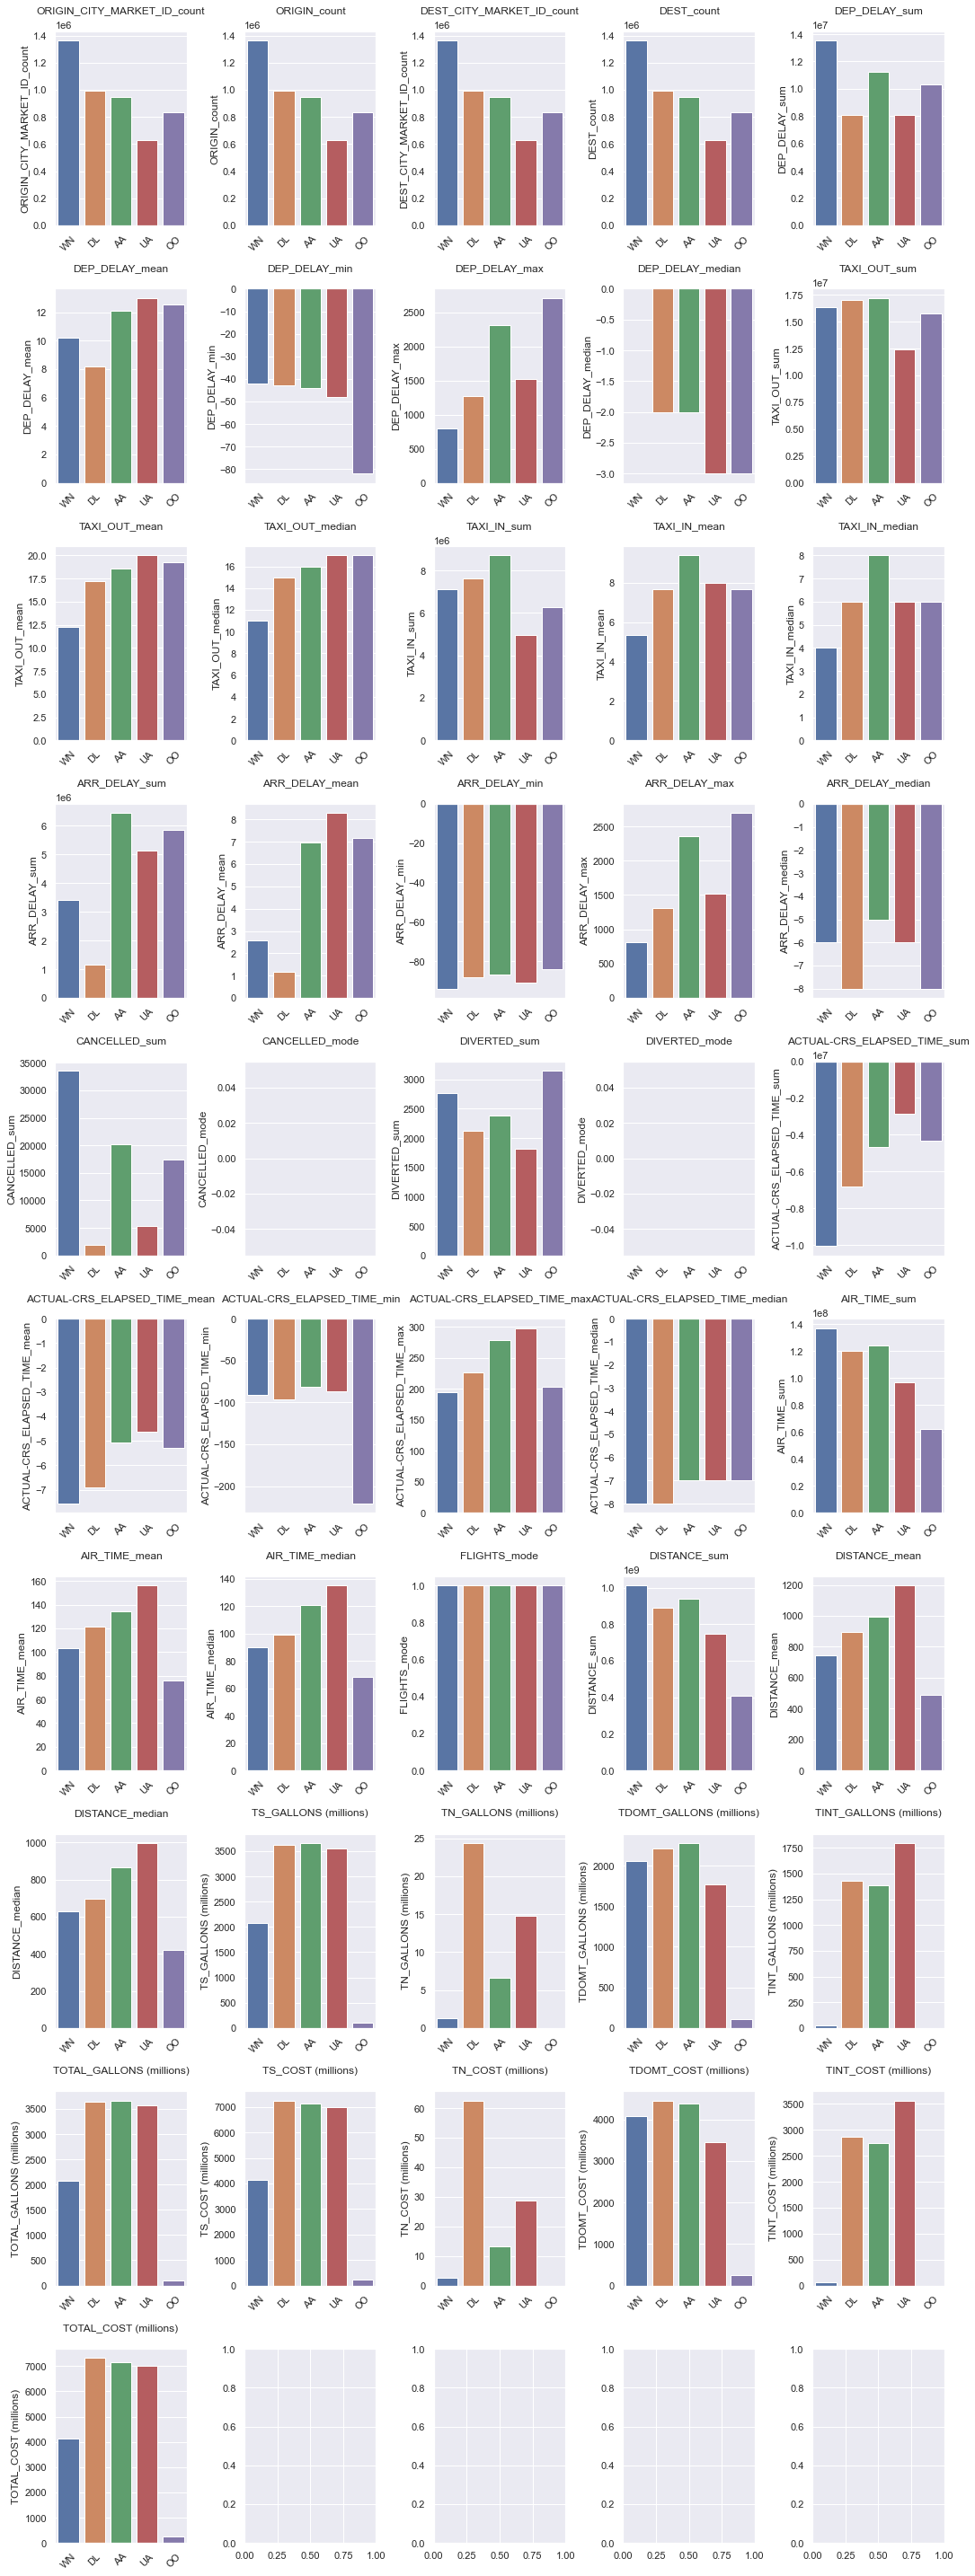

In [44]:
%%time

x_labels = list(df_OTPF_top5['OP_UNIQUE_CARRIER'].unique())
x_labels

fig, ax = plt.subplots(10, 5, figsize=(15,40))

k = 0
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        if i == 9 and j == 1:
            break
        ax[i,j].set_title(label=df_OTPF_top5[cols].columns[k],
                          fontdict={'fontsize' : 12},
                          loc='center',
                          pad=20)
        # The next line prevents the "UserWarning: FixedFormatter should only be used together with FixedLocator" message
        ax[i,j].set_xticks(np.arange(len(x_labels)))
        ax[i,j].set_xticklabels(labels=x_labels, rotation=45)
#         if i == 0:
#             ax[i,j].set_ylim(0, 4e3)
#         elif i == 1:
#             ax[i,j].set_ylim(0, 8e3)            
        # ax[i,j].tick_params(labelrotation=45)
            
        sns.barplot(x=x_labels, y=df_OTPF_top5[cols].columns[k],
                    data=df_OTPF_top5[cols], ax=ax[i,j])
        
        k += 1

fig.tight_layout()

fig_path = os.path.join(root,
                        "Output_Data",
                        "US_DoT",
                        "OTP_Fuel_analysis_top5_output_2019.png")

plt.savefig(fname = fig_path, dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', format="png", transparent=False,
            bbox_inches=None, pad_inches=0.1, metadata=None)

In [58]:
variable = 'TOTAL_COST (millions)'
df_OTPF_top5['Gallon_per_NM'] = df_OTPF_top5['TOTAL_GALLONS (millions)']*1e6 / df_OTPF_top5['DISTANCE_sum']
df_OTPF_top5['USD_per_NM'] = df_OTPF_top5['TOTAL_COST (millions)']*1e6 / df_OTPF_top5['DISTANCE_sum']

df_OTPF_top5[['OP_UNIQUE_CARRIER', 'DISTANCE_sum', 'Gallon_per_NM', 'TOTAL_GALLONS (millions)', variable]].sort_values(by=variable, ascending=False)

,OP_UNIQUE_CARRIER,DISTANCE_sum,Gallon_per_NM,TOTAL_GALLONS (millions),TOTAL_COST (millions)
2,DL,8.892775e+08,4.092353,3639.237450,7314.731583
3,AA,9.383259e+08,3.907551,3666.556610,7133.063028
5,UA,7.484520e+08,4.760794,3563.225897,7023.965924
0,WN,1.011585e+09,2.054011,2077.805715,4143.237164
6,OO,4.106058e+08,0.253739,104.186650,245.452427


### On-Time Performance

##### 'DEP_DELAY_sum', 'DEP_DELAY_mean', 'DEP_DELAY_min', 'DEP_DELAY_max', 'DEP_DELAY_median':
- WN (Southwest Airlines):
    - Carrier with the most accumulated Departure Delay time, which makes sense consideringit  is the one with most flights by far
    - A/L with the smallest Departure Delay variation range (min-max)
    - **Median of 0 minutes**; this means that despite having a few large values which move the mean rightwards, most of the times its Departure Delay is close to 0 min (or even departing ahead of time)
- DL (Delta Air Lines) is the A/L with the lowest average Departure Delay
- AA (American Airlines)
- OO (SkyWest Airlines):
    - **Minimum median value (-3 minutes)**; this means that despite having a few large values which move the mean rightwards, most of the times its Departure is ahead of time
- UA (United Airlines):
    - A/L with the biggest Departure Delay variation range (min-max)
    - Same median as "OO" **(3 minutes ahead of time)**

##### 'TAXI_OUT_sum', 'TAXI_OUT_mean', 'TAXI_OUT_median':
- It is remarkable how **WN (Southwest Airlines)** is by far the carrier with the **shortest Taxi-Out times** on average (and median); this however makes total sense considering that it is a **low-cost A/L**.
    - Many different factors may contribute to making this A/L the one whose Taxi-Out times are the lowest, and it would be worthwhile to look into it. For example, the **airports in which the carrier operates**; these could have been carefully handpicked to minimise the taxiing procedure times.

##### 'TAXI_IN_sum', 'TAXI_IN_mean', 'TAXI_IN_median':
- AA (American Airlines) is clearly the loser in this scope. Both on average and median it shows the highest Taxi-In times.
- DL (Delta Air Lines), UA (United Airlines) and OO (SkyWest Airlines) present similar values between them, which fall on the average area of the five carriers.
- Once again, **WN (Southwest Airlines)** is by far the carrier with the **shortest Taxi-In times** on average (and median); this however makes total sense considering that it is a **low-cost A/L**.
    - In line with what happens with Taxi-Out procedures, similar factors could drive this A/L to become the winner of this feature too.

##### 'ARR_DELAY_sum', 'ARR_DELAY_mean', 'ARR_DELAY_min', 'ARR_DELAY_max', 'ARR_DELAY_median':
- WN (Southwest Airlines):
    - It is worth to note that even though it is the one with **most flights** by far, the **cumuluative Arrival Delay time is one of the shortest** of the five carriers
    - A/L with the smallest Departure Delay variation range (min-max)
- DL (Delta Air Lines):
    - A/L with the lowest Arrival Delay on average (and median).
    - It shows the **minimum median value (-8 minutes)**; this means that despite having a few large values which move the mean rightwards, most of the times its Departure is ahead of time
- OO (SkyWest Airlines): same median as "DL" **(8 minutes ahead of time)**

##### 'CANCELLED_sum', 'CANCELLED_mode':
- WN (Southwest Airlines):
    - By far the A/L with **most Cancellations (33622)**, which makes sense considering it is the one with most flights. **Cancellations cost carriers a great deal of money, so this could be a good point to investigate**
- WN (Southwest Airlines) and OO (SkyWest Airlines) show a noticeable number of cancellations too.
- **DL (Delta Air Lines) and UA (United Airlines), on the contrary, hardly ever cancel their flights**

##### 'DIVERTED_sum', 'DIVERTED_mode':
- **OO (SkyWest Airlines)**: given that this A/L is the least flying one from the five, it is surprising to observe its **total number of diversions is the highest**

##### 'ACTUAL-CRS_ELAPSED_TIME_sum', 'ACTUAL-CRS_ELAPSED_TIME_mean', 'ACTUAL-CRS_ELAPSED_TIME_min', 'ACTUAL-RS_ELAPSED_TIME_max', 'ACTUAL-CRS_ELAPSED_TIME_median':
- **WN (Southwest Airlines) and DL (Delta Air Lines) show the best overall timing results**. Not only the difference between the Actual and the Scheduled (CRS) times is significantly lower than those corresponding to the other three carriers in mean, but also slightly better in their median and max values as well.

##### 'AIR_TIME_sum', 'AIR_TIME_mean', 'AIR_TIME_median' /// 'DISTANCE_sum', 'DISTANCE_mean', 'DISTANCE_median':
- The Air Times and Distances graphs resemble as expected. Since airspeed does not vary greatly among the carriers, these two features are strongly correlated.
- While cumulative values are still greater for WN (Southwest Airlines) due to its enormous number of flights, mean/median values adapt to each A/L's operating coverage. For example:
    - OO (SkyWest Airlines) is a regional carrier, covering distances in the range of 500 NM
    - UA (United Airlines), on the contrary, flies medium-haul routes (1200 NM).

##### 'FLIGHTS_mode':
- All carriers share a commonality: the most frequent number of legs; which is one, as expected.


### Fuel
- The Fuel Consumtpion and Fuel Cost graphs resemble as expected. Since fuel unitary price is not expected to vary greatly among the carriers, these two features are strongly correlated.

##### 'TS_GALLONS (millions)', 'TN_GALLONS (millions)' /// 'TS_COST (millions)', 'TN_COST (millions)',:
- For the five carriers, the Non-Scheduled fuel consumption is negligible when compared to the Scheduled one.
- DL (Delta Air Lines), AA (American Airlines) and UA (United Airlines) present significantly higher values of fuel consumption, since they cover greater distances

##### 'TDOMT_GALLONS (millions)', 'TINT_GALLONS (millions)' /// 'TDOMT_COST (millions)', 'TINT_COST (millions)':
- DL (Delta Air Lines), AA (American Airlines) and UA (United Airlines) present slightly higher values of domestic fuel consumption than WN (Southwest Airlines)
- However, these three carriers' international fuel consumption is considerably larger than the WN's (Southwest Airlines) one
- Also interesting to note that UA (United Airlines) domestic fuel consumption is lower than that of DL and AA, whilst its international fuel consumtpion is higher. This means that UA is more focused on international flights than DL and AA

##### 'TOTAL_GALLONS (millions)' /// 'TOTAL_COST (millions)':
- Even though **OO (SkyWest Airlines)** holds a cumulative distance  of 4.1e8 NM, which is around half (8.6e8 NM on average) of the major traditional carriers' (DL, AA and UA), **its total fuel consumption is SURPRISINGLY LOW**. When scaled to their cumulative distances, the following results are obtained: 0.253739 gallon/NM vs 4.253566 gallon/NM (on average).
# Almost 17 times greater !!! → Investigate
- The total fuel consumption scaled to the cumulative distance of **WN (Southwest Airlines)** is also quite low, but a little bit more reasonable: **2.054011 gallon/NM**

In [54]:
(3.907551 + 4.092353 + 4.760794) / 3

4.253566

In [56]:
4.253566 / 0.253739

16.76354837056976